In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [47]:
df=pd.read_csv(r"train.csv")
test_df=pd.read_csv(r"test.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [49]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [50]:
null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [51]:
column_to_drop=['Unnamed: 0', 'id']
train_df = df.drop(column_to_drop, axis=1)

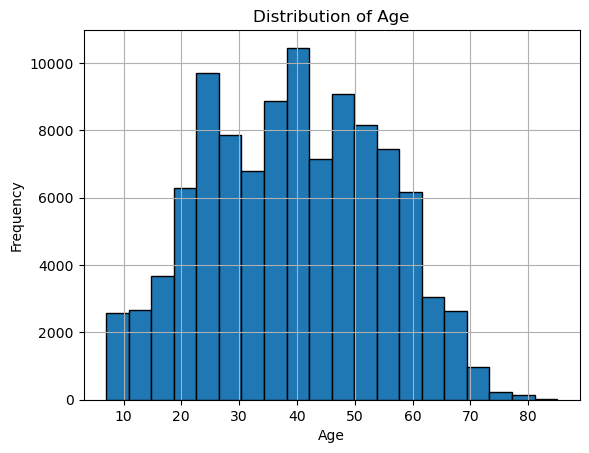

In [52]:
df['Age'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

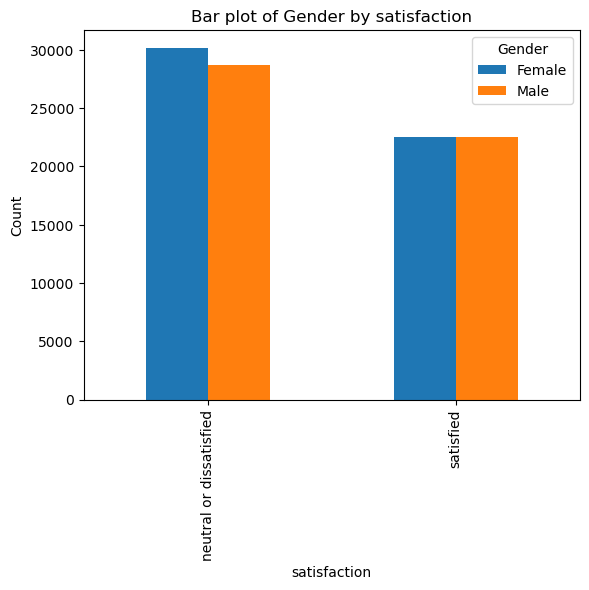

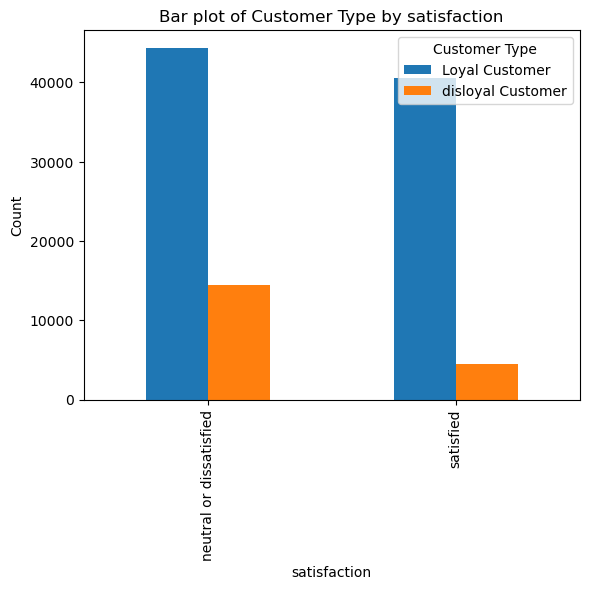

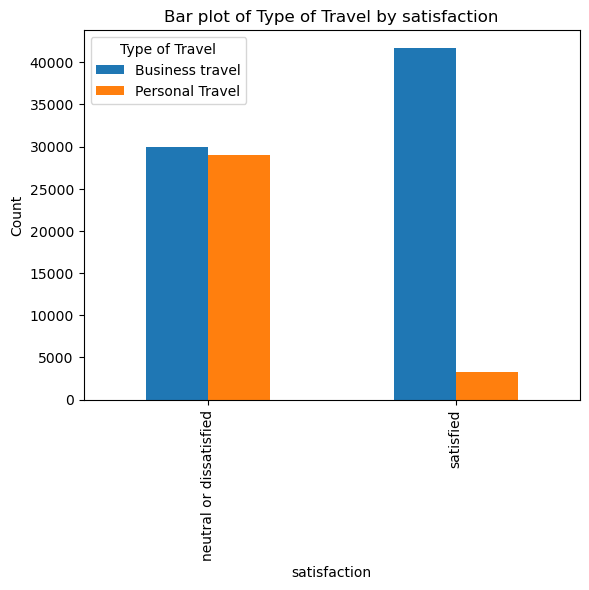

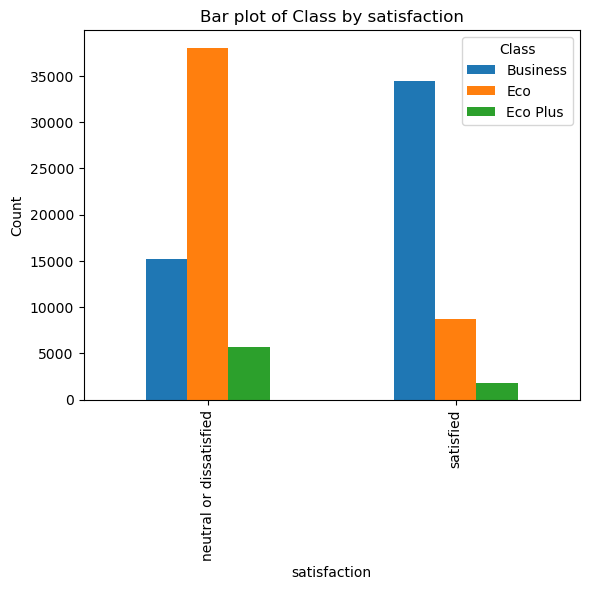

In [53]:
label_data=["Gender","Customer Type","Type of Travel","Class"]

for col in label_data:
    fig, ax = plt.subplots()
    counts = df.groupby(['satisfaction', col]).size().unstack()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('satisfaction')
    ax.set_ylabel('Count')
    ax.set_title(f'Bar plot of {col} by satisfaction')
    plt.show()

In [54]:
obj_data=["Gender","Customer Type","Type of Travel","Class",]
encoder=LabelEncoder()
for col in obj_data:
    train_df[col] = encoder.fit_transform(df[col])

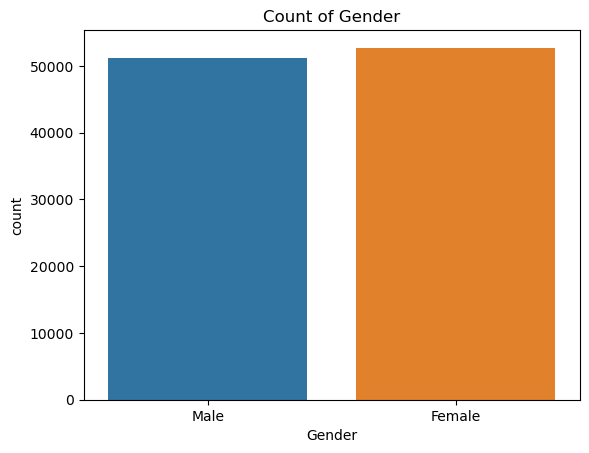

In [55]:
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')
plt.show()

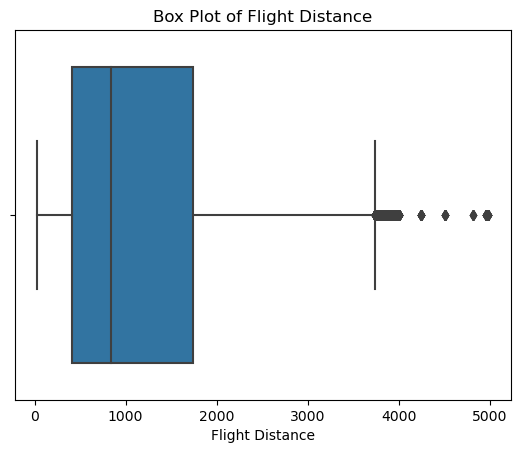

In [56]:
sns.boxplot(x='Flight Distance', data=df)
plt.title('Box Plot of Flight Distance')
plt.show()

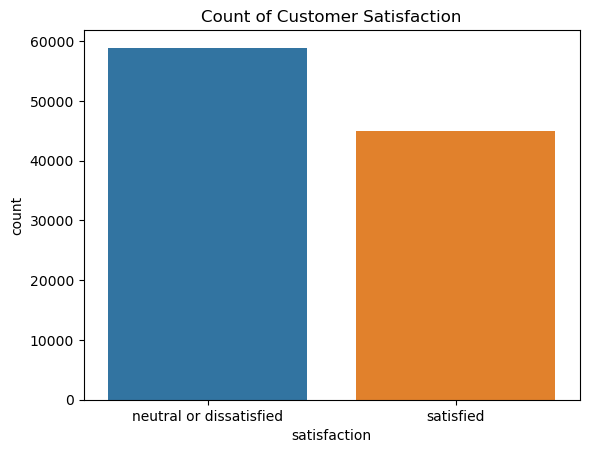

In [57]:
sns.countplot(x='satisfaction', data=df)
plt.title('Count of Customer Satisfaction')
plt.show()

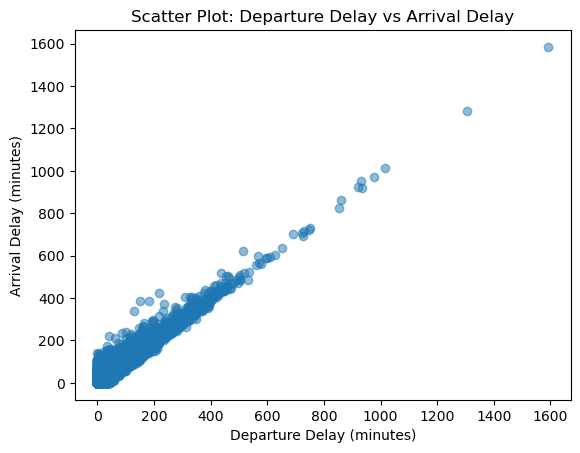

In [58]:
plt.scatter(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], alpha=0.5)
plt.title('Scatter Plot: Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

C:\Users\Niteesh.bv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


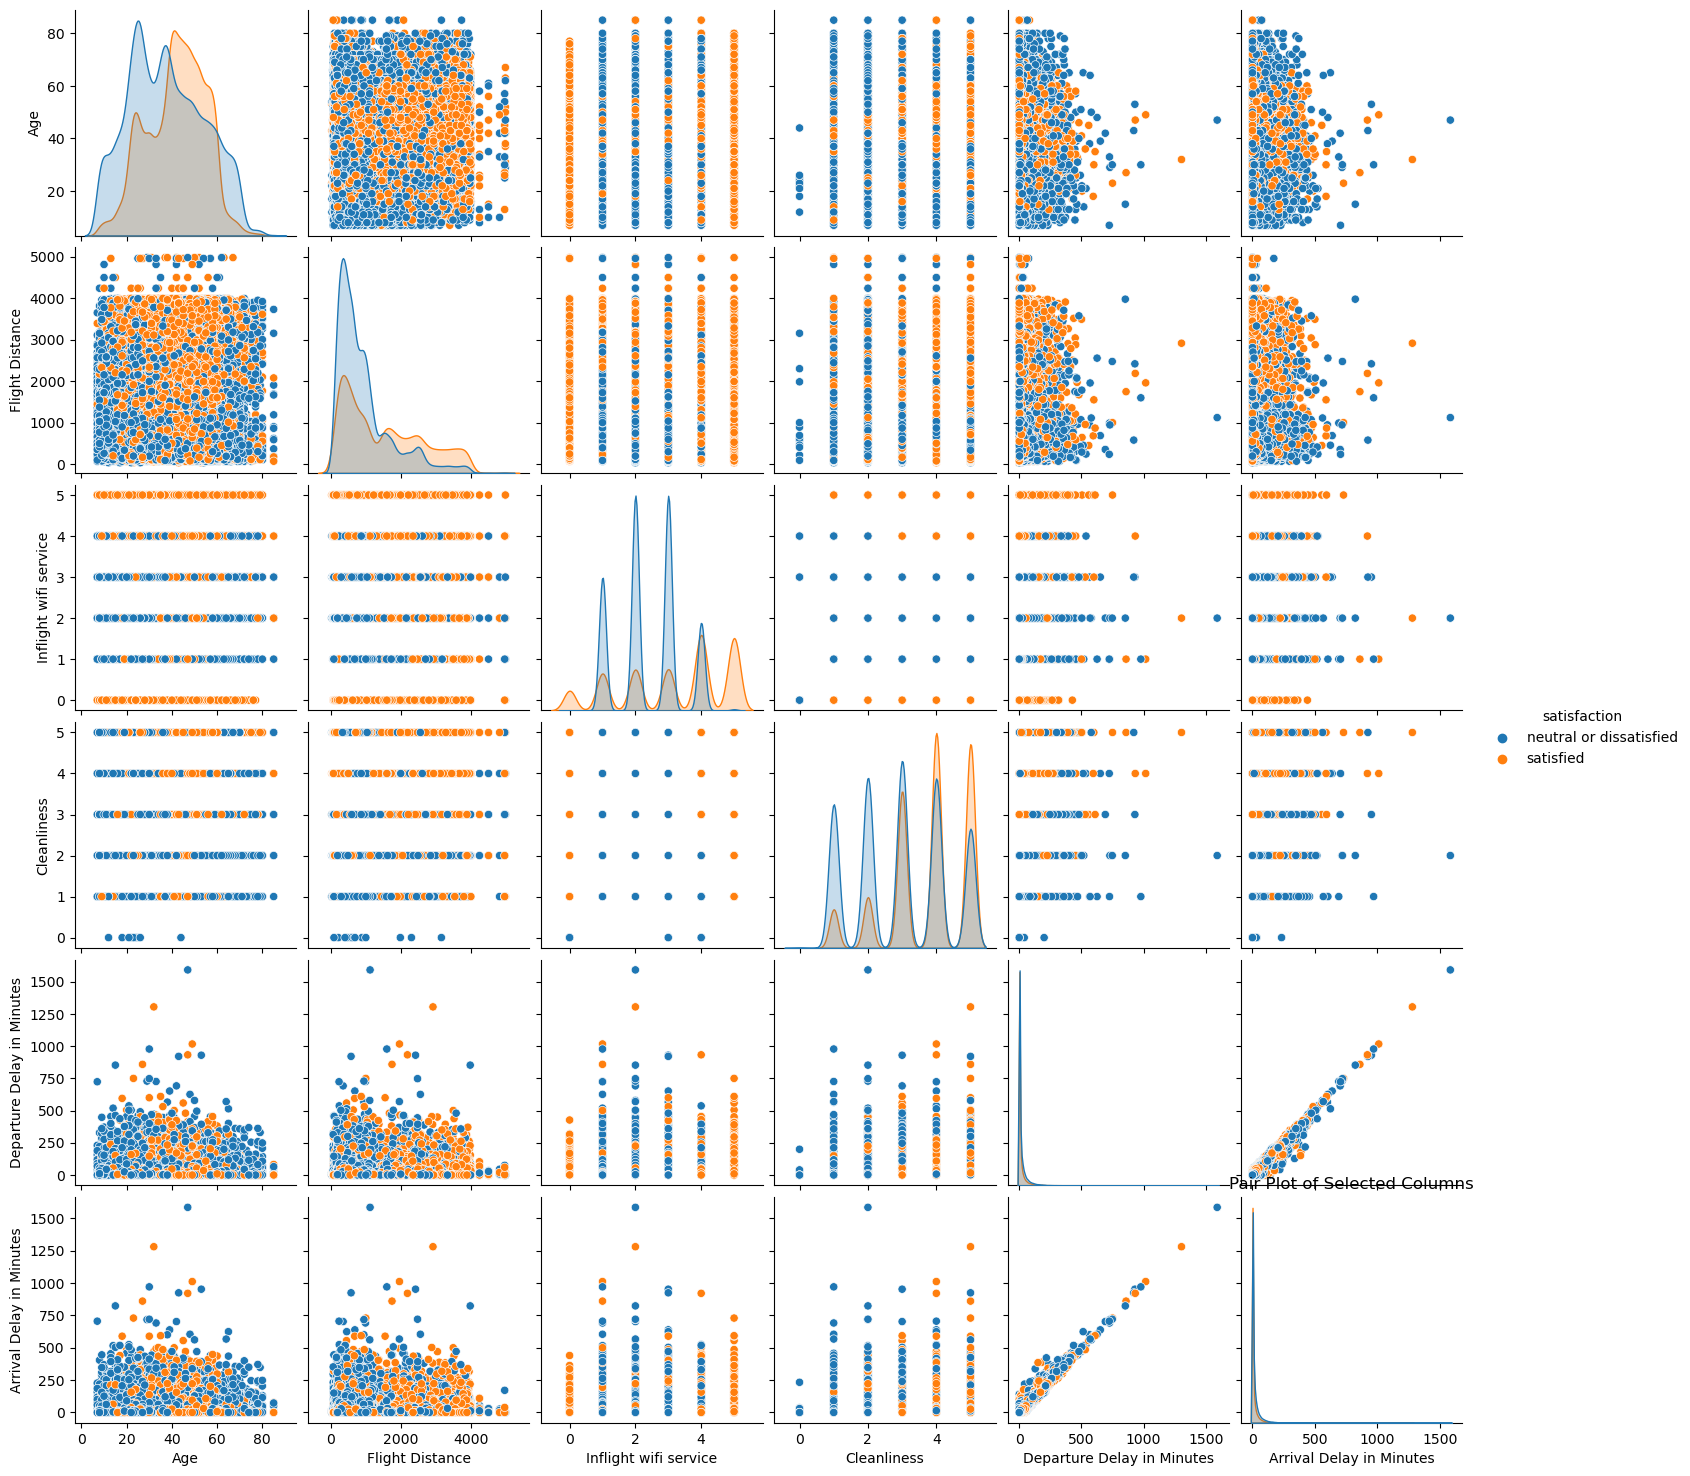

In [14]:
sns.pairplot(df[['Age', 'Flight Distance', 'Inflight wifi service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']], hue='satisfaction')
plt.title('Pair Plot of Selected Columns')
plt.show()

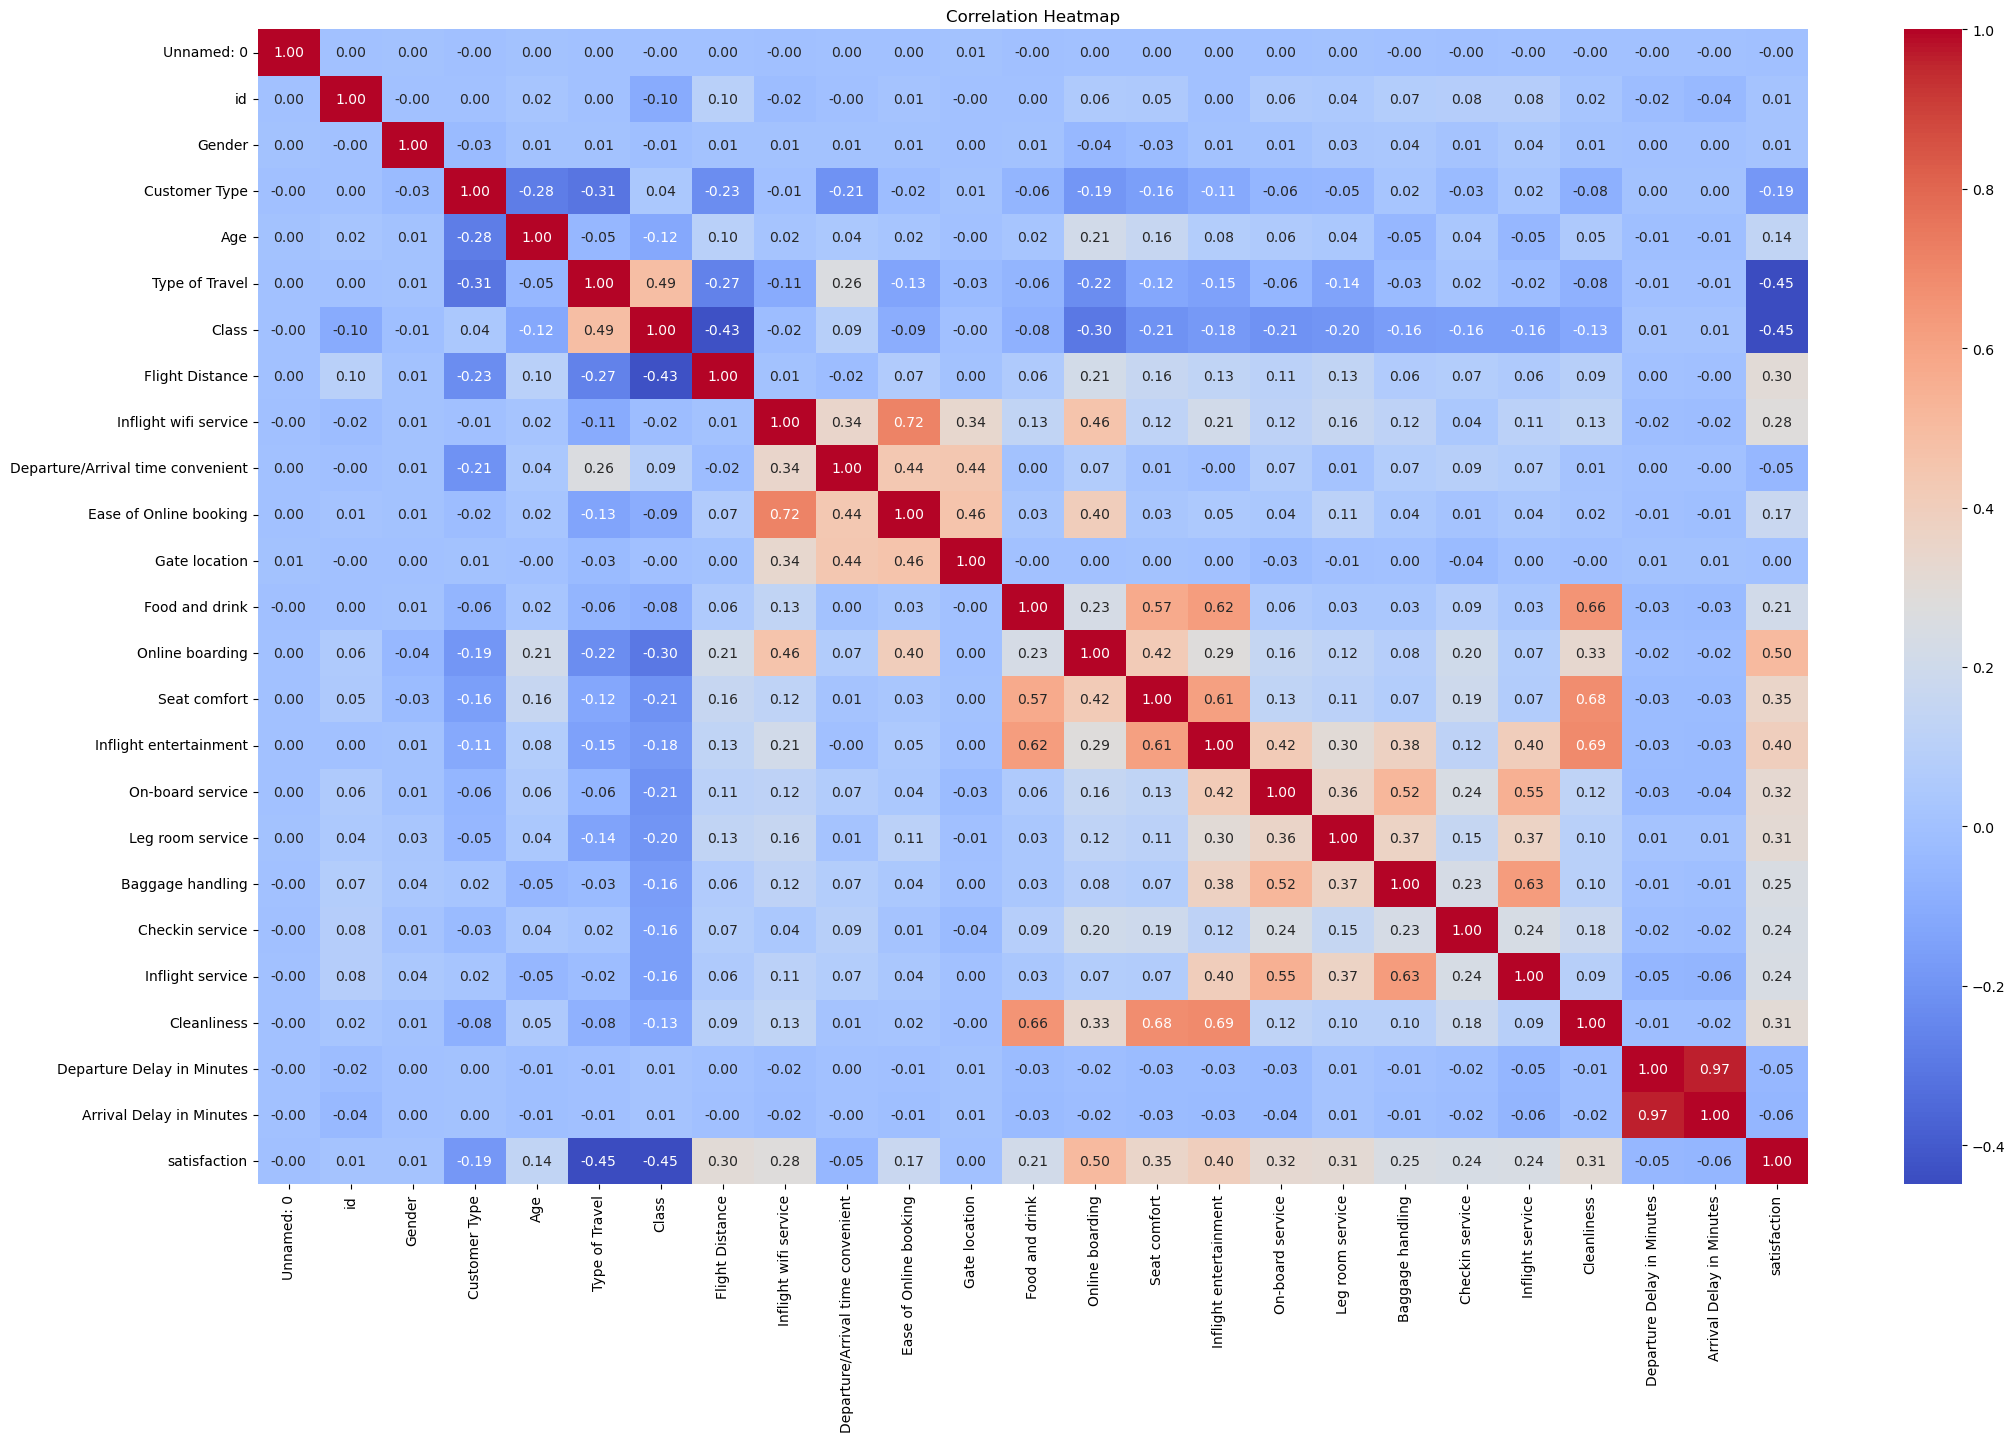

In [120]:
numeric_df = df.select_dtypes(include=['number'])
label_encoder = LabelEncoder()
df_encoded = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train = train_df.drop('satisfaction', axis=1)  
y_train = train_df['satisfaction']

X_test = test_df.drop('satisfaction', axis=1)  
y_test = test_df['satisfaction']


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=17, random_state=42)

In [96]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [110]:
y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy =", round(accuracy * 100, 2), "%")

Accuracy = 94.12 %


In [114]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[12  0]
 [ 1  4]]


In [115]:
from sklearn.metrics import classification_report
print('Classification report of Logistic Regression \n\n',classification_report(y_test, y_pred))

Classification report of Logistic Regression 

                          precision    recall  f1-score   support

neutral or dissatisfied       0.92      1.00      0.96        12
              satisfied       1.00      0.80      0.89         5

               accuracy                           0.94        17
              macro avg       0.96      0.90      0.92        17
           weighted avg       0.95      0.94      0.94        17

